# Compare metadata server performance

This notebook contains the analysis of parallel file system metadata server (MDS) performance across different HPC systems using the *mdtest* benchmark. The tests were conducted according to the US Trinity benchmark specfication:

* [NERSC mdtest benchmark description](http://www.nersc.gov/users/computational-systems/cori/nersc-8-procurement/trinity-nersc-8-rfp/nersc-8-trinity-benchmarks/mdtest/)

The source and build instructions for the mdtest benchmark can be found in the LANL IOR Github repo:

* [LANL IOR on Github](https://github.com/IOR-LANL/ior)

## Setup section

Import required python modules for the analysis

In [21]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,9)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")

In [22]:
import sys
sys.path.append('../../../python-modules')
from synthanalysis import mdtest

In [23]:
cpn = {}
cores = {}
create = {}
stat = {}
remove = {}
sty = {}
col = {}
files = {}
pal = sns.color_palette()
cols = pal.as_hex()

## Setup the results file lists for the systems

It would be better to have a more general way of getting the results files but for this initial analysis we explicitly set the file names.

We have Cirrus and ARCHER results out to higher core counts but restrict to the range where we can compare to CSD3. The higher core counts continue the trends shown in these comparisons.

In [24]:
sys = 'Cirrus'
files[sys] = {2:'../results/Cirrus/mdtest_{0}_1048576_2nodes_201711231231.log',
             4:'../results/Cirrus/mdtest_{0}_1048576_4nodes_201711231340.log',
             8:'../results/Cirrus/mdtest_{0}_1048576_8nodes_201711231400.log',
             16:'../results/Cirrus/mdtest_{0}_1048576_16nodes_201711231416.log',
             32:'../results/Cirrus/mdtest_{0}_1048576_32nodes_201711231427.log',
             64:'../results/Cirrus/mdtest_{0}_1048576_64nodes_201711231434.log',
             128:'../results/Cirrus/mdtest_{0}_1048576_128nodes_201711231441.log'
             }
cpn[sys] = 36
sty[sys] = 'o-'
col[sys] = cols[1]

In [25]:
sys = 'Peta4-Skylake'
files[sys] = {2:'../results/CSD3Skylake/mdtest_{0}_1048576_2nodes_201711281530.log',
               4:'../results/CSD3Skylake/mdtest_{0}_1048576_4nodes_201711281506.log',
               8:'../results/CSD3Skylake/mdtest_{0}_1048576_8nodes_201711281428.log',
               16:'../results/CSD3Skylake/mdtest_{0}_1048576_16nodes_201711281628.log',
               32:'../results/CSD3Skylake/mdtest_{0}_1048576_32nodes_201711281514.log'
              }
cpn[sys] = 32
sty[sys] = '^-'
col[sys] = cols[4]

In [26]:
sys = 'ARCHER'
files[sys] = {2:'../results/ARCHER/mdtest_{0}_1048576_2nodes_201711250820.log',
               4:'../results/ARCHER/mdtest_{0}_1048576_4nodes_201711241001.log',
               8:'../results/ARCHER/mdtest_{0}_1048576_8nodes_201711232038.log',
               16:'../results/ARCHER/mdtest_{0}_1048576_16nodes_201711241108.log',
               32:'../results/ARCHER/mdtest_{0}_1048576_32nodes_201711241600.log',
               64:'../results/ARCHER/mdtest_{0}_1048576_64nodes_201711242301.log',
               128:'../results/ARCHER/mdtest_{0}_1048576_128nodes_201711250804.log'
              }
cpn[sys] = 24
sty[sys] = '>-'
col[sys] = cols[0]

In [27]:
sys = 'NEXCS'
files[sys] = {2:'../results/NEXCS/mdtest_{0}_1048576_2nodes.log',
               4:'../results/NEXCS/mdtest_{0}_1048576_4nodes.log',
               8:'../results/NEXCS/mdtest_{0}_1048576_8nodes.log',
               16:'../results/NEXCS/mdtest_{0}_1048576_16nodes.log',
               32:'../results/NEXCS/mdtest_{0}_1048576_32nodes.log'
              }
cpn[sys] = 32
sty[sys] = '<-'

## Multiple processes creating files in single directory

In [28]:
systems = ['ARCHER','Cirrus','Peta4-Skylake']
test = 'mp-mf-sd'

In [29]:
for sys in systems:
    key = '{0},{1}'.format(sys, test)
    print(sys)
    cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(files[sys], test, cpn[sys])

ARCHER
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              48        4681.425        6508.458        1571.340
              4              96        8078.051        9034.181        2478.424
              8             192        8391.703       18867.906        2805.547
             16             384       12941.012       19603.802        3133.693
             32             768        5581.860       16226.720        2579.830
             64            1536       12363.501       20804.285        4368.109
            128            3072       11710.216       28306.555        6008.325
Cirrus
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              72       10372.759       15338.753        7840.810
              4           

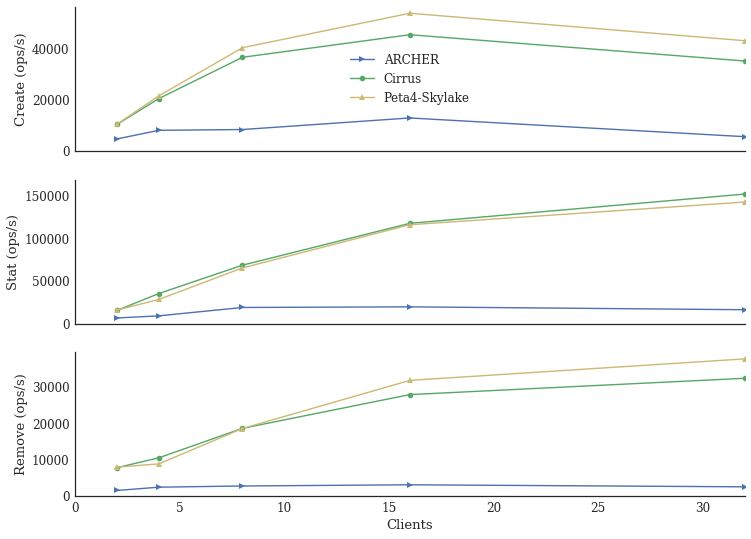

In [30]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Clients')
plt.xlim(0,32)
sns.despine()
plt.savefig("mdtest_mp-mf-sd_small.png", dpi=300)


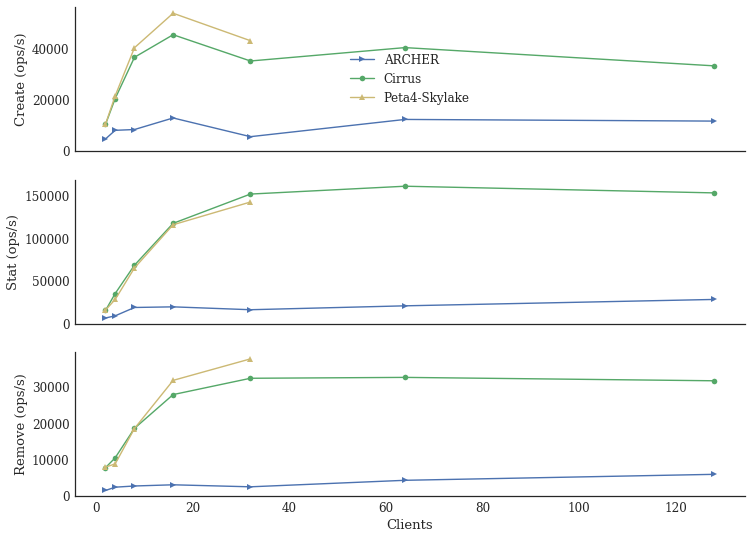

In [31]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Clients')

sns.despine()
plt.savefig("mdtest_mp-mf-sd_large.png", dpi=300)


In [32]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         ARCHER       12941.012       28306.555        6008.325
         Cirrus       45697.953      161379.650       32641.428
  Peta4-Skylake       54151.757      142800.723       37725.149


## Multiple processes creating files in multiple directories

In [33]:
systems = ['ARCHER','Cirrus','Peta4-Skylake']
test = 'mp-mf-md'

In [34]:
for sys in systems:
    key = '{0},{1}'.format(sys, test)
    print(sys)
    cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(files[sys], test, cpn[sys])

ARCHER
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              48        4878.045        7665.408        1993.050
              4              96        8893.743       17464.946        3119.114
              8             192        9633.525       27970.244        3510.650
             16             384       14062.439       18519.501        3731.414
             32             768        6247.791       10757.108        2424.931
             64            1536       11901.056       26540.730        4929.176
            128            3072       13610.762       19802.755        6469.594
Cirrus
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              72       12978.440      148081.027        8529.599
              4           

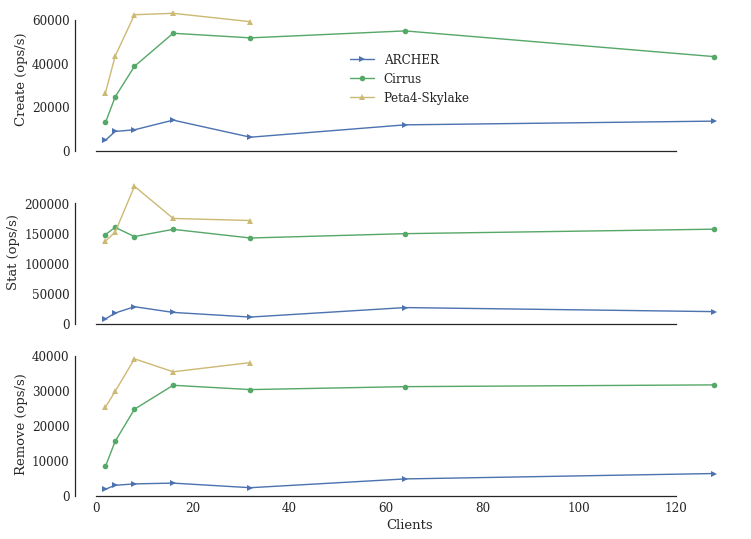

In [35]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], color=col[system],label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Clients')
sns.despine(trim=True)
# plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [36]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         ARCHER       14062.439       27970.244        6469.594
         Cirrus       54892.671      160014.067       31755.096
  Peta4-Skylake       62948.188      228447.780       39188.278


## Multiple processes creating single file in single directory

In [37]:
test = 'mp-sf-sd'

In [38]:
for sys in systems:
    key = '{0},{1}'.format(sys, test)
    print(sys)
    cores[key], create[key], stat[key], remove[key] = mdtest.calcperf(files[sys], test, cpn[sys])

ARCHER
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              48        3959.381       52634.403       77792.346
              4              96        9385.199       89062.859      161643.189
              8             192       14784.130      193722.966      309733.218
             16             384       17188.853      338648.599      358870.930
             32             768       23608.234      330043.593      317612.450
             64            1536       18955.521      641614.475     1008523.942
            128            3072       19236.193      982455.348      712936.529
Cirrus
        Clients           Cores  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
        =======           =====  ==============    ============  ==============
              2              72        8975.731       70350.098      144360.022
              4           

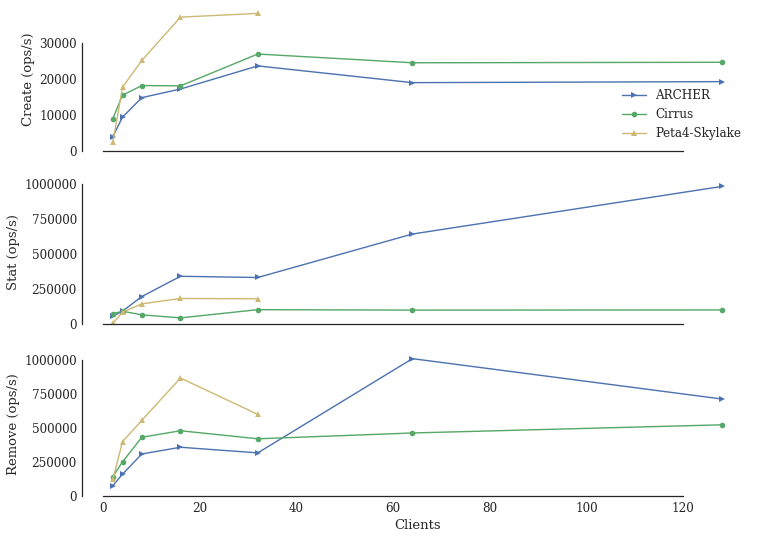

In [39]:
ax1 = plt.subplot(311)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], create[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Create (ops/s)')
plt.legend(loc='best')
plt.setp(ax1.get_xticklabels(), visible=False)
ax2 = plt.subplot(312, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], stat[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Stat (ops/s)')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.xaxis.set_visible(False)
ax3 = plt.subplot(313, sharex=ax1)
for system in systems:
    key = '{0},{1}'.format(system, test)
    plt.plot(cores[key], remove[key], sty[system], color=col[system], label=system)
plt.ylim(ymin=0)
plt.ylabel('Remove (ops/s)')
plt.xlabel('Clients')
sns.despine(trim=True)
# plt.savefig("mdtest_mp-mf-md.png", dpi=300)


In [20]:
print("Maximum performance:")
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('System', 'Create (ops/s)', 'Stat (ops/s)', 'Remove (ops/s)'))
print("{:>15s} {:>15s} {:>15s} {:>15s}".format('======', '==============', '============', '=============='))
for system in systems:
    key = '{0},{1}'.format(system, test)
    print("{:>15s} {:>15.3f} {:>15.3f} {:>15.3f}".format(system, max(create[key]), max(stat[key]), max(remove[key])))

Maximum performance:
         System  Create (ops/s)    Stat (ops/s)  Remove (ops/s)
         ======  ==============    ============  ==============
         ARCHER       23608.234      982455.348     1008523.942
         Cirrus       26907.952       99330.674      523405.488


KeyError: 'CSD3-Skylake,mp-sf-sd'